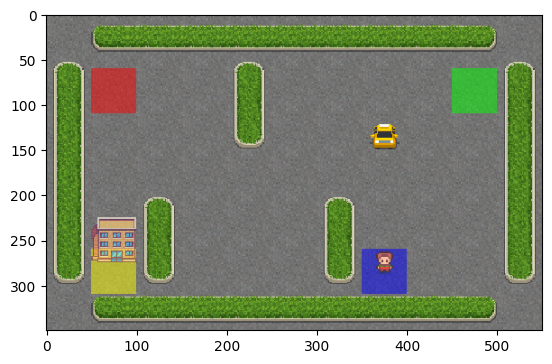

Episode: 1 Total Reward: -845
Episode: 2 Total Reward: -2510
Episode: 3 Total Reward: -549
Episode: 4 Total Reward: -338
Episode: 5 Total Reward: -319
Episode: 6 Total Reward: -2482
Episode: 7 Total Reward: -148
Episode: 8 Total Reward: -975
Episode: 9 Total Reward: -1368
Episode: 10 Total Reward: -2030
Episode: 11 Total Reward: -238
Episode: 12 Total Reward: -506
Episode: 13 Total Reward: -15
Episode: 14 Total Reward: -289
Episode: 15 Total Reward: -405
Episode: 16 Total Reward: -2251
Episode: 17 Total Reward: -190
Episode: 18 Total Reward: -217
Episode: 19 Total Reward: -1261
Episode: 20 Total Reward: -151
Episode: 21 Total Reward: -281
Episode: 22 Total Reward: -199
Episode: 23 Total Reward: -189
Episode: 24 Total Reward: -516
Episode: 25 Total Reward: -320
Episode: 26 Total Reward: -407
Episode: 27 Total Reward: -531
Episode: 28 Total Reward: -270
Episode: 29 Total Reward: -410
Episode: 30 Total Reward: -443
Episode: 31 Total Reward: -257
Episode: 32 Total Reward: -200
Episode: 33 

In [2]:
import gym
import random
import matplotlib.pyplot as plt

# Create Taxi environment
env = gym.make("Taxi-v3", render_mode="rgb_array")

# Reset environment and render initial state
env.reset()
img = env.render()
plt.imshow(img)
plt.show()

# Q-learning parameters
alpha = 0.4  # Learning rate
gamma = 0.999  # Discount factor
epsilon = 0.017  # Exploration rate
q = {}  # Q-table initialization

# Initialize Q-table
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        q[(s, a)] = 0.0

# Function to update Q-table
def update_q_table(prev_state, action, reward, next_state, alpha, gamma):
    qa = max([q[(next_state, a)] for a in range(env.action_space.n)])
    q[(prev_state, action)] += alpha * (reward + gamma * qa - q[(prev_state, action)])

# Epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return max(range(env.action_space.n), key=lambda x: q[(state, x)])  # Exploit

# Training loop
for i in range(1000):  # Number of episodes
    r = 0
    prev_state = env.reset()[0]  # Reset environment
    while True:
        action = epsilon_greedy_policy(prev_state, epsilon)
        next_state, reward, done, _, _ = env.step(action)
        update_q_table(prev_state, action, reward, next_state, alpha, gamma)
        prev_state = next_state
        r += reward
        if done:
            break
    print("Episode:", i+1, "Total Reward:", r)

print("Total reward: ",r)
    

# Close environment
env.close()
